<a href="https://colab.research.google.com/github/Marc86316/DataCamp/blob/main/Intro_to_Statistic_in_Python/Summary_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to Statistic in Python**

In [ ]:
# Importing numpy, pandas and matplotlib.pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the course datasets from github
# paste Raw URL from github
deals_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/amir_deals.csv"
happiness_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/world_happiness.csv"
food_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/food_consumption.csv"

amir_deals = pd.read_csv(deals_url)
world_happiness = pd.read_csv(happiness_url)
food_consumption = pd.read_csv(food_url)

## FutureWarning

在後續練習鐘，在使用 `groupby()`和 `.agg()`方法時，會遇到了關於 `np.var` 和 `np.std`和 `np.mean` 以及 `np.median` 的 `FutureWarning` 警告，該警告是確保程式碼的兼容性，因為在未來的 pandas 版本中，傳遞可呼叫物件（如 `np.var` 和 `np.std`）的行為將會改變。

##解决方案

| 方法 | 是否解决 `FutureWarning` | 可行性 |
|------|----------------|------|
| `agg(['mean', 'median'])` | ✅ 解决 | 最佳（直接使用 pandas 的方法） |
| `agg([np.mean, np.median])` | ❌ 觸發 | 不建議 |
| `agg([lambda x: np.mean(x), lambda x: np.median(x)])` | ✅ 解决 | 可行 |
| `agg([pd.Series.mean, pd.Series.median])` | ✅ 解决 | 可行 |


# **Summary Statistics 敘述統計學**

Summary statistics gives you the tools you need to boil down massive datasets to reveal the highlights.

**敘述統計學 Summary statistics** 價值是讓你能從海量資料中提取數據亮點

In this chapter, you'll explore summary statistics including mean, median, and standard deviation, and learn how to accurately interpret them. You'll also develop your critical thinking skills, allowing you to choose the best summary statistics for your data.

**學習目標**：平均值、中位數和標準差在內的統計數據，**準確描述資料性質** 與 **批判性思考** 是本章節核心。

## **What is Statistic? 什麼是統計學？**

### Descriptive and inferential statistics 描述統計和推論統計


**Descriptive and inferential statistics**

Statistics can be used to answer lots of different types of questions, but being able to identify which type of statistics is needed is essential to drawing accurate conclusions. In this exercise, you'll sharpen your skills by identifying which type is needed to answer each question.

**Instructions**

Identify which questions can be answered with descriptive statistics and which questions can be answered with inferential statistics.
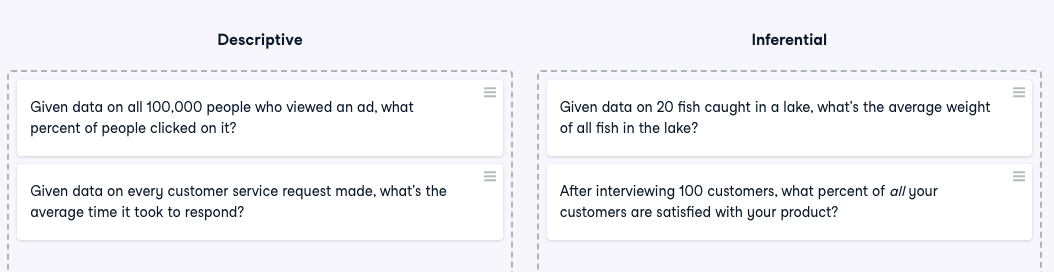

### Data type classification 資料類型分類

**Data type classification**

you learned about two main types of data: numeric and categorical. Numeric variables can be classified as either discrete or continuous, and categorical variables can be classified as either nominal or ordinal. These characteristics of a variable determine which ways of summarizing your data will work best.

**Instructions**

Map each variable to its data type by dragging each item and dropping it into the correct data type.

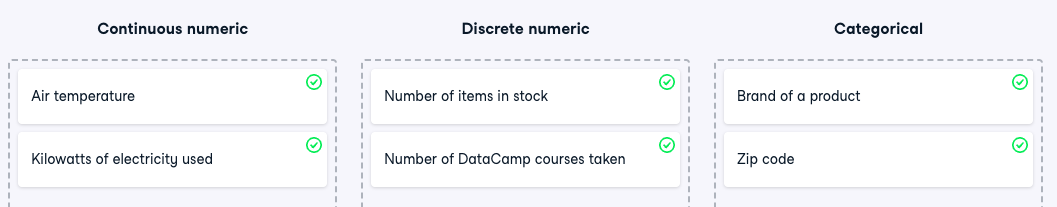

## **Measure of center 集中度**

### Mean and median

In this chapter, you'll be working with the `food_consumption` dataset from `2018 Food Carbon Footprint Index` by nu3. The `food_consumption` dataset contains the number of kilograms of food consumed per person per year in each country and food category (`consumption`), and its carbon footprint (`co2_emissions`) measured in kilograms of carbon dioxide, or CO2.

In this exercise, you'll compute measures of center to compare food consumption in the US and Belgium using your `pandas` and `numpy` skills.

`pandas` is imported as `pd` for you and `food_consumption` is pre-loaded.

**Instructions**

* Subset `food_consumption` to get the rows where the `country` is `'USA'`.
* Calculate the mean of food `consumption` in the `usa_consumption` DataFrame, which is already created for you.
* Calculate the median of food `consumption` in the `usa_consumption` DataFrame.

In [ ]:
# Subset country for USA: usa_consumption
usa_consumption = food_consumption[food_consumption['country']=='USA']

# Calculate mean consumption in USA
print(np.mean(usa_consumption['consumption']))

# Calculate median consumption in USA
print(np.median(usa_consumption['consumption']))

44.650000000000006
14.58


### Mean vs. median

you learned that the mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. In this exercise, you'll compare these two measures of center.


**Instructions 1/4**

* Subset `food_consumption` to get the rows where `food_category` is `'rice'`.
* Create a histogram of `co2_emission` in `rice_consumption` DataFrame and show the plot.

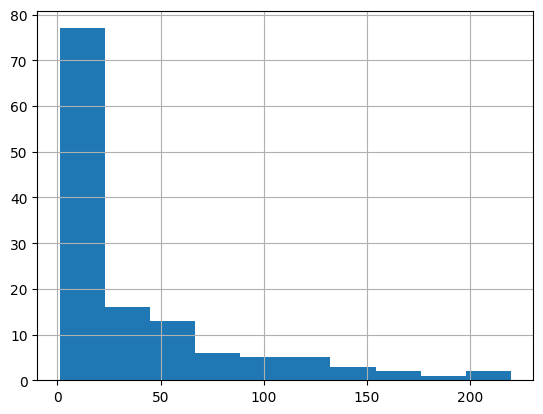

In [ ]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category']=='rice']

# Histogram of co2_emission for rice and show plot
# co2_emission= food_consumption[food_consumption['co2_emission']=='rice']
# plt.plot(x=rice_consumption, y=co2_emission, type="hist")
rice_consumption['co2_emission'].hist()
plt.show()

**Instructions 2/4**

**Question**

Take a look at the histogram you just created of different countries' CO2 emissions for rice. Which of the following terms best describes the shape of the data?

**Possible answers**

No skew

Left-skewed

Right-skewed ✅

**Instructions 3/4**

Use `.agg()` to calculate the mean and median of `co2_emission` for rice.

In [ ]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg(['mean','median']))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


**Instructions 4/4**

**Question**

Given the skew of this data, what measure of central tendency best summarizes the kilograms of CO2 emissions per person per year for rice?

**Possible answers**


Mean

Median ✅

Both mean and median

## **Measures of spread 離度**

### Variance and standard deviation

Variance and standard deviation are two of the most common ways to measure the spread of a variable, and you'll practice calculating these in this exercise. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.




**Instructions**

*   Calculate the variance and standard deviation of `co2_emission` for each `food_category` with the `.groupby()` and .`agg() `methods; compare the values of variance and standard deviation.
*   Create a histogram of `co2_emission` for the beef in `food_category` and show the plot.
* Create a histogram of `co2_emission` for the eggs in `food_category` and show the plot.

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


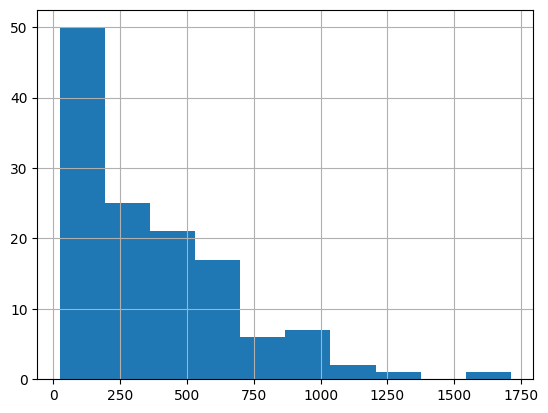

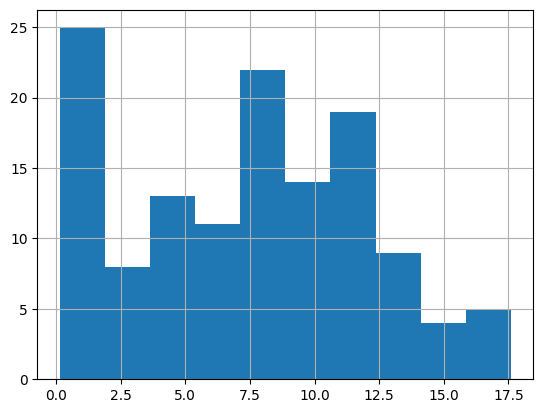

In [ ]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'std']))

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
plt.show()

### Quartiles, quantiles, and quintiles
Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In this exercise, you'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.

**Instructions 1/3**

Calculate the quartiles of the `co2_emission` column of `food_consumption`.

In [ ]:
# Calculate the quartiles of co2_emission
import numpy as np

# Example of calculating quartiles
quartiles = np.quantile(food_consumption['co2_emission'], [0,0.25, 0.5, 0.75,1])
print(quartiles)

[   0.        5.21     16.53     62.5975 1712.    ]


 **Instructions 2/3**

Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the `co2_emission` column of `food_consumption`.



In [ ]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0,0.2, 0.4, 0.6,0.8,1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


**Instructions 3/3**

Calculate the eleven quantiles of `co2_emission` that split up the data into ten pieces (deciles).

In [ ]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


### Finding outliers using IQR

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than $Q_1 - 1.5 \times IQR$
or greater than $Q_3 + 1.5 \times IQR$, it's considered an outlier. In fact, this is how the lengths of the whiskers in a `matplotlib` box plot are calculated.

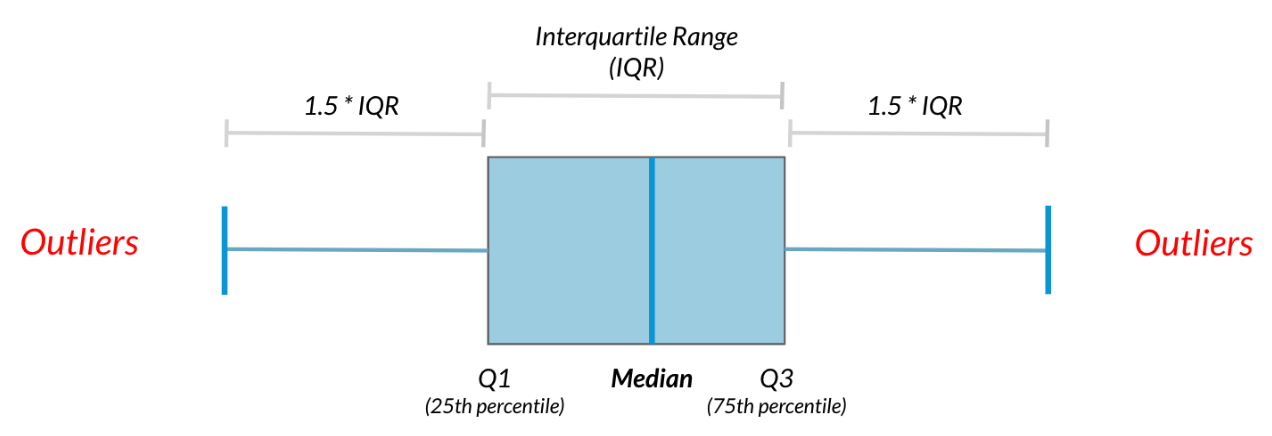

In this exercise, you'll calculate IQR and use it to find some outliers. `pandas` as pd and `numpy` as `np` are loaded and `food_consumption` is available

**Instructions 1/4**

* Calculate the total `co2_emission` per country by grouping by country and taking the sum of `co2_emission`. Store the resulting DataFrame as `emissions_by_country`.

In [ ]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


**Instructions 2/4**

* Compute the first and third quartiles of `emissions_by_country` and store these as `q1` and `q3`.
* Calculate the interquartile range of `emissions_by_country` and store it as `iqr`.

In [ ]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country,0.25)
q3 = np.quantile(emissions_by_country,0.75)
iqr = np.quantile(emissions_by_country,0.75) - np.quantile(emissions_by_country,0.25)

**Instructions 3/4**

* Calculate the lower and upper cutoffs for outliers of `emissions_by_country`, and store these as `lower` and `upper`

In [ ]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1-1.5*iqr
upper = q3+1.5*iqr

**Instructions 4/4**


* Subset `emissions_by_country` to get countries with a total emission greater than the `upper` cutoff or a total emission less than the `lower` cutoff.

In [ ]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country< lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
